In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import math
import time
import numpy as np
import torch
from src import helpers

In [2]:
n = 10_000
a = torch.ones(n)
b = torch.ones(n)


In [3]:
c = torch.zeros(n)
timer = helpers.Timer()
for i in range(n):
    c[i] = a[i]+b[i]
print(f"took {timer.stop():.5f} seconds")

took 0.08289 seconds


In [4]:
timer.start()
d = a+b
print(f"took {timer.stop():.5f} seconds")

took 0.00019 seconds


In [5]:
## NORMAL Distribution
## Linear Regression & Normal Distr. (aka Gaussian distr.) was both invented by Gauss in 1795

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2*math.pi*sigma**2)
    return p * np.exp(-((x-mu)**2)/(2*sigma**2))

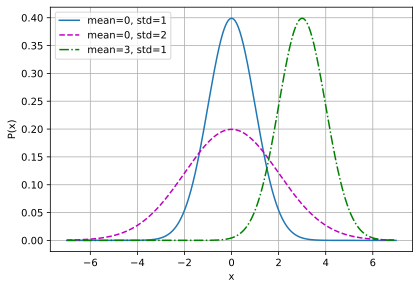

In [6]:
## use numpy for visualization
x = np.arange(-7, 7, 0.01)

## mean and std pairs
params = [(0,1), (0,2), (3,1)]
helpers.plot(
    x, 
    [normal(x, mu, sigma) for mu, sigma in params],
    xlabel="x",
    ylabel="P(x)",
    figsize=(6.5, 4.5),
    legend=[f"mean={mu}, std={sigma}" for mu, sigma in params]
)



## Linear Regression from SCRATH

In [7]:
%matplotlib inline
import random
import torch


In [8]:
## GOLD values
gold_w = torch.tensor([2, 3.4])
gold_b = 4.2
gold_mu = 0.0
gold_sigma = 0.01
num_examples = 10_000

In [9]:
features, labels = helpers.synthetic_data(gold_w, gold_b, num_examples)

In [10]:
features.shape, labels.shape

(torch.Size([10000, 2]), torch.Size([10000, 1]))

In [11]:
features[:4, :]

tensor([[-0.1538,  0.1433],
        [-0.3515,  2.0681],
        [-0.4115,  0.3819],
        [-1.2910,  2.0312]])

In [12]:
labels[:4]

tensor([[ 4.3808],
        [10.5399],
        [ 4.6615],
        [ 8.5313]])

In [13]:
helpers.set_figsize()

In [14]:
features[:, (1)].shape

torch.Size([10000])

In [15]:
features[:].shape

torch.Size([10000, 2])

In [16]:
features[:4, (1)]

tensor([0.1433, 2.0681, 0.3819, 2.0312])

In [17]:
features[:4]

tensor([[-0.1538,  0.1433],
        [-0.3515,  2.0681],
        [-0.4115,  0.3819],
        [-1.2910,  2.0312]])

In [18]:
features[:4, 1]

tensor([0.1433, 2.0681, 0.3819, 2.0312])

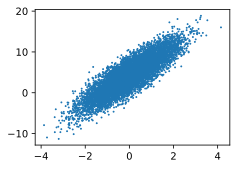

In [19]:
plt.scatter(
    features[:, 1].detach().numpy(),
    labels.detach().numpy(),
    s=1,     ## size of the marker
)

In [20]:
helpers.data_iter??

Signature: helpers.data_iter(batch_size, features, labels)
Source:   
def data_iter(batch_size, features, labels):
    """Iterate through the whole dataset consisting of (features, labels) with batch-wise random smapling"""
    num_examples = len(features)
    idxs = list(range(num_examples))
    ## randomly sample from the indices
    random.shuffle(idxs)
    for i in range(0, num_examples, batch_size):
        batch_idxs = torch.tensor(idxs[i : min(i + batch_size, num_examples)])
        yield features[batch_idxs], labels[batch_idxs]
File:      ~/Desktop/flashAI/sutram/d2l/src/helpers.py
Type:      function


In [21]:
bs = 10
for X, Y in helpers.data_iter(bs, features, labels):
    print(f"{X}\n\n{Y}")
    print("--"*20)
    break

tensor([[-0.2862, -0.0738],
        [-2.0026, -1.2347],
        [-0.1527,  0.9124],
        [-1.1193,  0.8632],
        [ 0.5595, -0.0652],
        [-1.2958,  1.0602],
        [-1.1485, -0.5682],
        [ 0.5003, -0.4431],
        [-1.3651,  1.8706],
        [-1.3444,  0.5070]])

tensor([[ 3.3915],
        [-4.0064],
        [ 7.0012],
        [ 4.9039],
        [ 5.0836],
        [ 5.2098],
        [-0.0218],
        [ 3.6819],
        [ 7.8282],
        [ 3.2470]])
----------------------------------------


In [22]:
## Initializing model parameters

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [23]:
## Hyperparams & Model

lr = 0.03
num_epochs = 3
model = helpers.linear_regression
loss_fn = helpers.squared_loss

## Training loop

for epoch in range(num_epochs):
    for xb, yb in helpers.data_iter(bs, features[:1000], labels[:1000]):
        preds = model(xb, w, b)     ## forward pass
        loss = loss_fn(preds, yb)   ## compute the loss
        loss.sum().backward()       ## calculate the gradients
        helpers.sgd([w, b], lr, bs) ## optimizer

    with torch.no_grad():
        preds = model(features, w, b)
        train_loss = loss_fn(preds, labels)
        print(f"epoch = {epoch+1}/{num_epochs}: loss = {train_loss.mean():f}")
        # print(w, b)

epoch = 1/3: loss = 0.026475
epoch = 2/3: loss = 0.000094
epoch = 3/3: loss = 0.000050


In [24]:
print(gold_w, gold_b)

tensor([2.0000, 3.4000]) 4.2


In [25]:
print(w.data)
print(b.data)

tensor([[2.0002],
        [3.4008]])
tensor([4.1999])


In [26]:
w.shape, gold_w.shape

(torch.Size([2, 1]), torch.Size([2]))

In [27]:
gold_w - w.reshape(gold_w.shape)

tensor([-0.0002, -0.0008], grad_fn=<SubBackward0>)

In [28]:
gold_b - b

tensor([9.3937e-05], grad_fn=<RsubBackward1>)

In [29]:
from torch.utils import data

In [30]:
batch_size = 10
data_iter = helpers.load_array((features, labels), batch_size, True)

In [31]:
next(iter(data_iter))

[tensor([[-0.3598, -0.4923],
         [-0.2531,  0.5298],
         [-2.6157, -0.2516],
         [-0.5971, -0.7104],
         [ 1.5719,  1.2863],
         [-0.8107,  1.8638],
         [-0.9631,  0.9617],
         [ 1.0554, -0.6580],
         [-0.0754,  0.0469],
         [ 0.6011, -0.6677]]),
 tensor([[ 1.8058],
         [ 5.5130],
         [-1.8923],
         [ 0.5906],
         [11.7254],
         [ 8.9156],
         [ 5.5438],
         [ 4.0725],
         [ 4.1968],
         [ 3.1320]])]

In [32]:
## building the model
from torch import nn

model = nn.Sequential(
    nn.Linear(2,1),
)

In [33]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [34]:
model[0]

Linear(in_features=2, out_features=1, bias=True)

In [35]:
model[0].weight

Parameter containing:
tensor([[ 0.0286, -0.4564]], requires_grad=True)

In [36]:
model[0].bias


Parameter containing:
tensor([0.1965], requires_grad=True)

In [37]:
model[0].weight.data.normal_(0, 0.01)
model[0].bias.data.fill_(0)

tensor([0.])

In [38]:
model[0].weight

Parameter containing:
tensor([[-0.0028,  0.0050]], requires_grad=True)

In [39]:
model[0].bias

Parameter containing:
tensor([0.], requires_grad=True)

In [40]:
## defining the loss function
loss_fn = nn.MSELoss()

In [41]:
## defining the optimizer
optim = torch.optim.SGD(model.parameters(), lr=0.03)

In [42]:
num_epochs = 3
for epoch in range(num_epochs):
    for xb, yb in data_iter:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        train_loss = loss_fn(model(features), labels)
        print(f"epoch #{epoch+1}/{num_epochs} => train_loss = {train_loss}")

epoch #1/3 => train_loss = 0.00010037005267804489
epoch #2/3 => train_loss = 0.00010013749852078035
epoch #3/3 => train_loss = 9.997087909141555e-05


In [43]:
model[0].weight

Parameter containing:
tensor([[1.9998, 3.3994]], requires_grad=True)

In [44]:
model[0].bias

Parameter containing:
tensor([4.2003], requires_grad=True)

In [45]:
gold_w, gold_b

(tensor([2.0000, 3.4000]), 4.2)

In [46]:
nn.MSELoss?

Init signature: nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean') -> None
Docstring:     
Creates a criterion that measures the mean squared error (squared L2 norm) between
each element in the input :math:`x` and target :math:`y`.

The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = \left( x_n - y_n \right)^2,

where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
(default ``'mean'``), then:

.. math::
    \ell(x, y) =
    \begin{cases}
        \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
        \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
    \end{cases}

:math:`x` and :math:`y` are tensors of arbitrary shapes with a total
of :math:`n` elements each.

The mean operation still operates over all the elements, and divides by :math:`n`.

The division by :math:`n` can be avoided if one sets ``reduction = 's

In [47]:
model[0].weight.grad

tensor([[0.0080, 0.0023]])

In [48]:
nn.HuberLoss?

Init signature: nn.HuberLoss(reduction: str = 'mean', delta: float = 1.0) -> None
Docstring:     
Creates a criterion that uses a squared term if the absolute
element-wise error falls below delta and a delta-scaled L1 term otherwise.
This loss combines advantages of both :class:`L1Loss` and :class:`MSELoss`; the
delta-scaled L1 region makes the loss less sensitive to outliers than :class:`MSELoss`,
while the L2 region provides smoothness over :class:`L1Loss` near 0. See
`Huber loss <https://en.wikipedia.org/wiki/Huber_loss>`_ for more information.

For a batch of size :math:`N`, the unreduced loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1, ..., l_N\}^T

with

.. math::
    l_n = \begin{cases}
    0.5 (x_n - y_n)^2, & \text{if } |x_n - y_n| < delta \\
    delta * (|x_n - y_n| - 0.5 * delta), & \text{otherwise }
    \end{cases}

If `reduction` is not `none`, then:

.. math::
    \ell(x, y) =
    \begin{cases}
        \operatorname{mean}(L), &  \text{if reduction} = \text

In [49]:
## The image Classification Challenge

import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [50]:
helpers.use_svg_display()

In [51]:
## Step-1: Reading the data

## `ToTensor` trasnforms converts the image data from PIL type to 32-bit floating point tensors
## It divids all numbers by 255 so that all pixel values are in (0,1)

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data",
    train=True,
    transform=trans,
    download=True,
)

mnist_test = torchvision.datasets.FashionMNIST(
    root="../data",
    train=False,
    transform=trans,
    download=True,
)

In [52]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [53]:
type(mnist_train)

torchvision.datasets.mnist.FashionMNIST

In [54]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

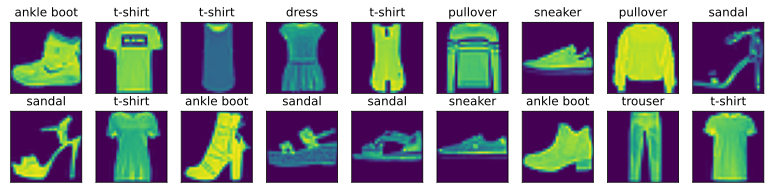

In [56]:
x, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
helpers.show_images(x.reshape(18,28,28), 2, 9, titles=helpers.get_fashion_mnist_labels(y))

In [58]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=helpers.get_dataloader_workers())

In [63]:
next(iter(train_iter))[0].shape

torch.Size([256, 1, 28, 28])

In [64]:
## looking at the time it takes to read the dataset
timer = helpers.Timer()
for xb, yb in train_iter:
    continue
print(f"{timer.stop():.2f} seconds")

5.10 seconds


In [ ]:
## Putting it all together
